# Predicting diabetes progression

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "1"

In [2]:
sklearn.__version__

'1.0.1'

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd
import numpy as np

In [5]:
%matplotlib inline

## Framing the problem
* Diabetes is widespread condition where pancreas stops making insulin due to high sugar/carb diet over long period of time which leads to insulin resistance eventually turning into diabetes
* Given a sample in which features of various patients after a year of diabetes are recorded, we can predict "response of interest" to extrapolate diabetes progression after a year against baseline for new patients
* This could help medical practitioners infer disease progression given certain features of a new patient
* There is loads of research published in this domain where response of interest for five subgroups of diabetes with differences in diabetes progression and risk of complications could be used to gain insights about patient's health
* In this approach I will be using root mean squared error as performance metric which indicates prediction error for a given prediction model
* The lower the error, the better the prediction which is in alignment with business objective of precisely predicting the ROI
* However, this is just a dummy project and no care has been taken into ensuring effectiveness of statistical design of the experiment. The sample used here may or may not be representative of population.
* It's not clear the minimum performance required for predictions to be clinically effective and no expert or existing solution has been consulted
* This is a supervised learning (regression) problem


##  Loading Diabetes dataset from sklearn API
* See [toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html) for full info
* Data is open to access for public usage and no authorization is required
* Data is already anonymized

In [6]:
diabetes = datasets.load_diabetes(as_frame=True) #
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [7]:
diabetes.frame.info() #no missing values, low memory usage, batch algorithms will be easy to use

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [8]:
diabetes.frame.describe() #description isn't helpful in this case since features are already scaled, example mean age is negative

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [9]:
diabetes.frame #the age is negative but that is due to scaling (those ages must have been lower than mean age)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [10]:
train_set,test_set = train_test_split(diabetes.frame,random_state=42,test_size=0.2)

## Data exploration
* Data is clean and already scaled
* Data seems to be normally distributed 
* feature s4 seems to have some issues

In [11]:
diabetes_cpy = train_set.copy()

In [12]:
corr_matrix = diabetes_cpy.corr()
corr_matrix['target'].sort_values(ascending=False) #bmi,s5,bp,s4 are strongly correlated to target ROI

target    1.000000
bmi       0.604751
s5        0.552183
bp        0.444774
s4        0.425094
s6        0.390363
s1        0.199547
age       0.196510
s2        0.154922
sex       0.007116
s3       -0.384000
Name: target, dtype: float64

In [13]:
from pandas.plotting import scatter_matrix


Correlation


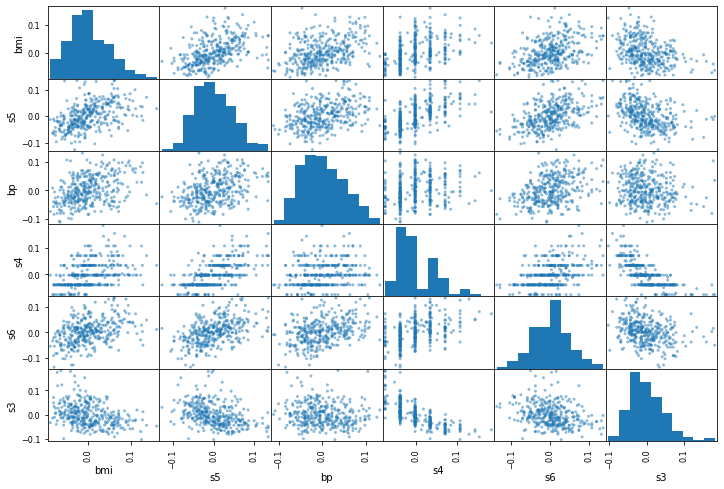

In [14]:
scatter_matrix(diabetes_cpy[['bmi','s5','bp','s4','s6','s3']],figsize=(12,8))
print("Correlation")

## Data preparation
* data is already processed for the most part, we just need to split labels from features

In [15]:
diabetes_cpy

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027368,-0.001078,144.0
66,-0.009147,0.050680,-0.018062,-0.033214,-0.020832,0.012152,-0.072854,0.071210,0.000271,0.019633,150.0
137,0.005383,-0.044642,0.049840,0.097616,-0.015328,-0.016345,-0.006584,-0.002592,0.017037,-0.013504,280.0
245,-0.027310,-0.044642,-0.035307,-0.029771,-0.056607,-0.058620,0.030232,-0.039493,-0.049868,-0.129483,125.0
31,-0.023677,-0.044642,-0.065486,-0.081414,-0.038720,-0.053610,0.059685,-0.076395,-0.037128,-0.042499,59.0
...,...,...,...,...,...,...,...,...,...,...,...
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059473,-0.083920,134.0
270,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008640,0.015491,202.0
348,0.030811,-0.044642,-0.020218,-0.005671,-0.004321,-0.029497,0.078093,-0.039493,-0.010904,-0.001078,148.0
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038459,-0.038357,64.0


In [16]:
features = list(diabetes.frame)[:-1]

In [17]:
X_train = train_set[features].values
y_train = train_set['target'].values

In [18]:
X_train.shape

(353, 10)

In [19]:
y_train.shape

(353,)

## Modeling 
    - since the dataset is small, its ok to use batch learning. following models are suitable
* ordinary least squares
* ridge
* lasso
* elastic net


In [20]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

### model 1: ordinary least squares

In [21]:
ord_reg = LinearRegression()

In [22]:
scores = cross_val_score(ord_reg, X_train,y_train, cv=10, scoring='neg_mean_squared_error')

In [23]:
ord_rmse_scores = np.sqrt(-scores)

In [24]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(ord_rmse_scores)

Scores: [50.71003485 56.90938406 51.37648692 61.12835413 57.66091696 46.42711614
 51.39636946 60.45229914 59.60467565 60.66548473]
Mean: 55.63311220404554
Standard deviation: 4.9529496262767765


### model 2: ridge regression

In [25]:
ridge_reg = Ridge()

In [26]:
scores = cross_val_score(ridge_reg, X_train,y_train, cv=10, scoring='neg_mean_squared_error')

In [27]:
ridge_rmse_scores = np.sqrt(-scores)

In [28]:
display_scores(ridge_rmse_scores)

Scores: [53.6456505  63.70198492 59.98453967 59.31307032 62.86514367 46.84977464
 63.40448801 68.86049072 54.3821343  62.16169984]
Mean: 59.51689766093815
Standard deviation: 5.9974190572102755


### model 3: lasso regression

In [29]:
lasso_reg = Lasso()

In [30]:
scores = cross_val_score(lasso_reg, X_train,y_train, cv=10, scoring='neg_mean_squared_error')

In [31]:
lasso_rmse_scores = np.sqrt(-scores)

In [32]:
display_scores(lasso_rmse_scores)

Scores: [55.67564921 69.8400982  66.85454931 56.43525511 65.61627216 51.76221803
 71.32370272 70.80379026 55.35952246 64.47243182]
Mean: 62.81434893043919
Standard deviation: 6.941920238033101


### model 4: elastic net

In [33]:
elastic_reg = ElasticNet()

In [34]:
scores = cross_val_score(elastic_reg, X_train,y_train, cv=10, scoring='neg_mean_squared_error')

In [35]:
elastic_rmse_scores = np.sqrt(-scores)

In [36]:
display_scores(elastic_rmse_scores)

Scores: [73.91764487 83.63539523 83.79539616 60.30777606 79.95106045 67.79567775
 94.55362505 87.5770592  64.23029702 76.76700753]
Mean: 77.25309393043293
Standard deviation: 10.267659937532317


### Interpretation
- the lesser the rmse (on average), the better the model. Here ordinary least squares is better performer than ridge or lasso
- plausible explanation is that ridge and lasso could be overfitting the training data because of regularization parameter when in fact the data is linear
- ordinary linear regression is selected as the final model here, however for the sake of quick cross check, performance with ridge regression will also be compared
- if ordinary linear regression is infact better performer, the ridge regression should converge to linear regression as regularization parameter is made smaller

## Model optimisation
- the model can be improved using domain knowledge about features in the dataset, however, in the absence of it, i will be taking purely machine learning approach

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
ord_reg.get_params() # there aren't many parameters to optimise here so default version will be used.

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [39]:
ridge_reg = Ridge(random_state=42)

In [40]:
ridge_reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': 42,
 'solver': 'auto',
 'tol': 0.001}

In [41]:
param_grid = [
    {'alpha': [0.0001,0.001,0.01,0.1,1.0,10]}
]

In [42]:
grid_search = GridSearchCV(ridge_reg,param_grid=param_grid,cv=10,scoring="neg_mean_squared_error")

In [43]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10]}],
             scoring='neg_mean_squared_error')

In [44]:
grid_search.best_params_ 

{'alpha': 0.01}

In [45]:
grid_search.best_score_

-3112.7748092688407

In [46]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
#as predicted ridge regression appears to converge to linear regression to get better score for given tolerance

55.848731786552214 {'alpha': 0.0001}
55.8199936531731 {'alpha': 0.001}
55.79224685625092 {'alpha': 0.01}
55.827790236617176 {'alpha': 0.1}
59.81830942554606 {'alpha': 1.0}
72.29734828898935 {'alpha': 10}


In [47]:
# thus ordinary linear regression is selected as final model

In [48]:
final_model = LinearRegression()

In [49]:
final_model.fit(X_train,y_train)

LinearRegression()

## Model evaluation

In [50]:
X_test = test_set[features].values
y_test = test_set['target'].values

In [51]:
final_pred = final_model.predict(X_test)

In [52]:
final_mse = mean_squared_error(y_test,final_pred)
print("final rmse: {}".format(np.sqrt(final_mse)))

final rmse: 53.8532569849144


## Solution

- In this report I analysed diabetes dataset for prediction of disease progression after a year against the baseline
- After trying out linear models, ordinary linear regression seems to be the winner
- The solution could be used as hypothesis in predicting disease progression in clinical practice (at least theoretically)
- In future, nonlinear regressive models will be tried to see if score improves due to presence of some nonlinear relationships 